# Exercise 1

### 1.1

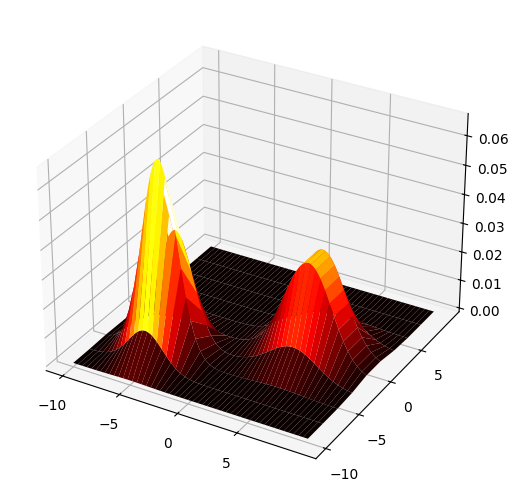

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from scipy.stats import norm


def gauss(X, Y, xmean, ymean, stddev):
    ZX = norm.pdf(X, loc=xmean, scale=stddev)
    ZY = norm.pdf(Y, loc=ymean, scale=stddev)
    return ZX * ZY


x = np.linspace(-10, 10, 1000)
y = np.linspace(-10, 10, 10)

X, Y = np.meshgrid(x, y)
G0 = gauss(X, Y, -5, -5, 1.5)
G1 = gauss(X, Y, 5, 0, 2)

Z = G0 + G1

fig = plt.figure()
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)
ax.set_xticks(list(range(-10, 10, 5)))
ax.set_yticks(list(range(-10, 10, 5)))
ax.plot_surface(X, Y, Z, cmap=plt.cm.hot, antialiased=True, shade=False, linewidth=0)

plt.show()



### 1.2

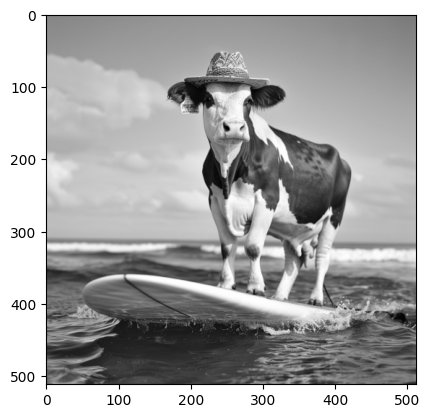

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

order = [
    [2, 4, 11, 6],
    [7, 10, 9, 1],
    [5, 14, 8, 15],
    [3, 0, 13, 12],
]


def reorder_image(img):
    w, h, c = img.shape
    s = w // 4

    assert len(set(cell for row in order for cell in row)) == 16

    img_target = np.copy(img)

    for x_src, row in enumerate(order):
        for y_src, cell in enumerate(row):
            x_target, y_target = cell // 4, cell % 4

            src = img[
                s * x_target : s * (x_target + 1), s * y_target : s * (y_target + 1)
            ]
            img_target[s * x_src : s * (x_src + 1), s * y_src : s * (y_src + 1)] = src

    return img_target


img = plt.imread("cow_tiles.png")
img_target = reorder_image(img)

plt.imshow(img_target)
plt.show()

### 1.3

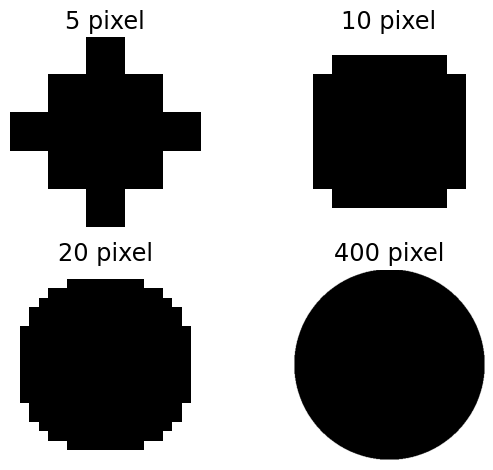

In [1]:
import matplotlib.pyplot as plt
import numpy as np

fig, axes = plt.subplots(2, 2)

for i, row in enumerate([[5, 10], [20, 400]]):
    for j, diameter in enumerate(row):
        radius = diameter / 2
        img = np.ones((diameter, diameter))

        x = np.linspace(-1, 1, diameter)
        y = np.linspace(-1, 1, diameter)
        X, Y = np.meshgrid(x, y)

        Z = (X**2 + Y**2) ** (1 / 2)
        img[Z <= 1] = 0

        axes[i][j].set_title(f"{diameter} pixel", fontsize="xx-large")
        axes[i][j].imshow(img, cmap="grey")
        axes[i][j].set_xticks([])
        axes[i][j].set_yticks([])
        axes[i][j].axis("off")

plt.tight_layout()
plt.show()


# Exercise 2

  E(X):  0.2652133818474061
Var(X):  1.0033594446349678


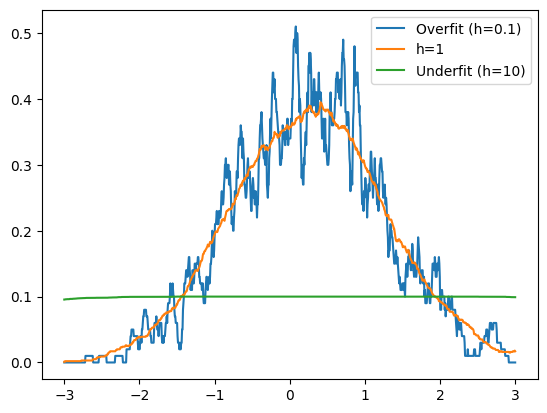

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Task 1
X = np.random.normal(0.2, 1, size=1000)
print("  E(X): ", np.mean(X))
print("Var(X): ", np.var(X))
print("=" * 10)

# Task 2
S = np.linspace(-3, 3, 1000)


# Task 3
def C(s, X, *, h):
    left_bound = s - (h / 2)
    right_bound = s + (h / 2)
    mask = (left_bound < X) & (X < right_bound)

    return np.count_nonzero(mask)


# Task 4
def P_hat(s, X, *, h):
    return (1 / X.size) * (1 / h) * C(s, X, h=h)


plt.plot(S, ([P_hat(s, X, h=0.1) for s in S]), label="Overfit (h=0.1)")
plt.plot(S, ([P_hat(s, X, h=1) for s in S]), label="h=1")
plt.plot(S, ([P_hat(s, X, h=10) for s in S]), label="Underfit (h=10)")
plt.legend()
plt.show()

# Exercise 3

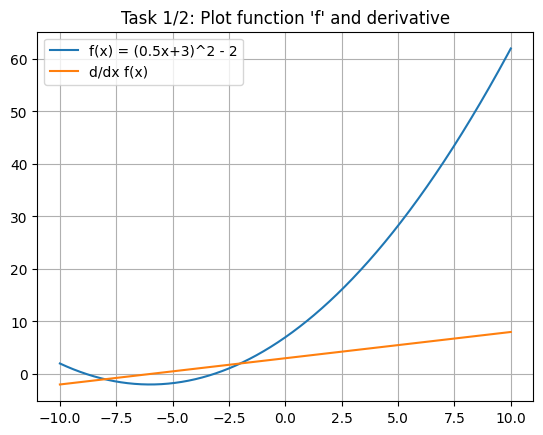

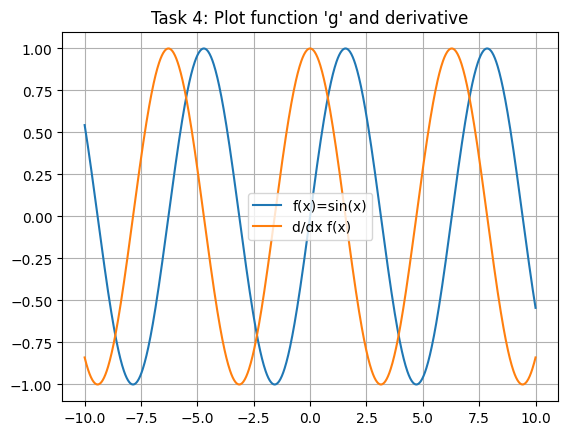

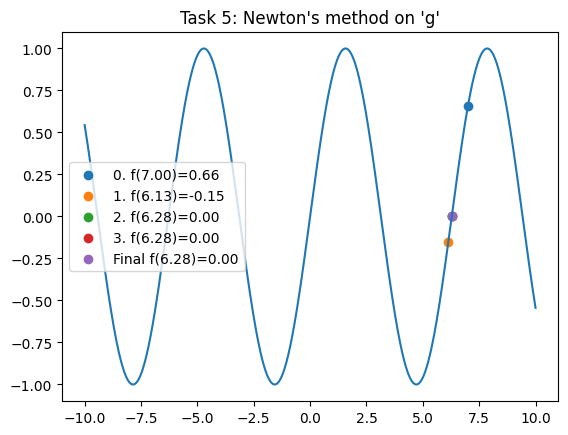

In [4]:
import torch
import matplotlib.pyplot as plt


def evaluate_fn_and_grad(f, *, lower, upper):
    x = torch.linspace(lower, upper, 1000, requires_grad=True)
    y = f(x)
    y.sum().backward()

    return x.detach(), y.detach(), x.grad


# Task 1 + 2
def f(x):
    return (0.5 * x + 3) ** 2 - 2


def task_1_and_2():
    x, y, grad = evaluate_fn_and_grad(f, lower=-10, upper=10)

    plt.figure()
    plt.title("Task 1/2: Plot function 'f' and derivative")
    plt.plot(x, y, label="f(x) = (0.5x+3)^2 - 2")
    plt.plot(x, grad, label="d/dx f(x)")
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()


task_1_and_2()


# Task 4
def g(x):
    return torch.sin(x)


def task_4():
    x, y, grad = evaluate_fn_and_grad(g, lower=-10, upper=10)

    plt.figure()
    plt.title("Task 4: Plot function 'g' and derivative")
    plt.plot(x, y, label="f(x)=sin(x)")
    plt.plot(x, grad, label="d/dx f(x)")
    plt.grid()
    plt.legend()
    plt.show()
    plt.close()


task_4()


# Task 5
def task_5():
    def newton_method(f, x_0, *, iterations):
        x_i = torch.tensor([x_0], requires_grad=True)

        for iteration in range(iterations):
            x_i = torch.clone(x_i).detach()
            x_i.requires_grad = True

            y_i = f(x_i)
            y_i.sum().backward()
            df = x_i.grad

            plt.scatter(
                [x_i.detach().numpy()],
                [y_i.detach().numpy()],
                label=f"{iteration}. f({x_i.item():.2f})={y_i.item():.2f}",
            )

            x_i = x_i - y_i / df

        plt.scatter(
            [x_i.detach().numpy()],
            [y_i.detach().numpy()],
            label=f"Final f({x_i.item():.2f})={y_i.item():.2f}",
        )

    x = torch.linspace(-10, 10, 1000)
    y = g(x)

    plt.figure()
    plt.title("Task 5: Newton's method on 'g'")
    plt.plot(x, y)
    newton_method(g, 7.0, iterations=4)
    plt.legend()
    plt.show()
    plt.close()


task_5()